# CS 1656 – Introduction to Data Science 

## Instructor: Xiaowei Jia
### Teaching Assistants: Evangelos Karageorgos, Sonal Gupta


## Term Project 

**Released: April 7, 2022**

**Due: April 26, 2022**

### Goal
The goal of this project is to expose you with a real data science problem, looking at the end-to-end pipeline. 

### What to do 
You are asked to write a Python Jupyter notebook, called `bikes_pgh_data.ipynb` that will:
* [Task 1] access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data  
* [Task 2] create graphs to show the popularity of the different rental stations, given filter conditions  
* [Task 3] cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.  

**Your program should not take more than 15 minutes to run**

### Jupyter Notebook Rules
This skeleton is provided for you to complete the project. Please add your code in the code cells below each Task. Feel free to add cells as needed. Do not remove existing cells.

In [186]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import cluster
from sklearn.cluster import DBSCAN

import numpy as np
# Feel free to add here any other libraries as specified in the project description

For the sake of interactive display in Jupyter, we will enable matplotlib inline.

In [187]:
%matplotlib inline

### [Task 0] Warming Up
Task 0 is for testing. It is used to ensure that this Jupyter Notebook skeleton works on both your machines and our machine. Please run the following code to see if you can see a line plot. The line plot is the basic plot that we have seen in Recitation2. 

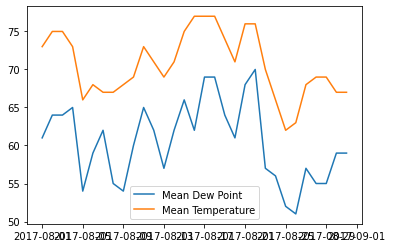

In [188]:
import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
df = pd.read_csv('KPIT_Aug17.csv', sep=',', engine='python', parse_dates=['EST'])
p1 = plt.plot(df['EST'],df['MeanDew PointF'])
p2 = plt.plot(df['EST'],df['Mean TemperatureF'])
plt.legend([p1[0],p2[0]], ['Mean Dew Point', 'Mean Temperature'])

plt.show()

--- 
Add your code below this line

---
### Task 1

In this task you will need to access historical bike rental data for 2021 from HealthyRidePGH and summarize the rental data.

### Task 1.1

In [189]:
df = pd.concat(map(pd.read_csv, ['HealthyRideRentals2021-Q1.csv', 'HealthyRideRentals2021-Q2.csv' ,'HealthyRideRentals2021-Q3.csv']), ignore_index=True)

df['fromdate'] = df['Starttime'].str.split()
df['todate'] = df['Stoptime'].str.split()
for i in df.index:
    df['fromdate'][i] = pd.Timestamp(df['fromdate'][i][0]).date()
    df['todate'][i] = pd.Timestamp(df['todate'][i][0]).date()
    
df = df[['From station id', 'To station id', 'fromdate', 'todate', 'Starttime', 'Bikeid']]
to_df = df[['To station id','todate']]
from_df = df[['From station id','fromdate']]

from_df_grouped = from_df.groupby(['From station id', 'fromdate']).size()
new_from_df = from_df_grouped.to_frame(name='fromCNT').reset_index()
new_from_df.columns = ['Station ID', 'Date', 'fromCNT']

to_df_grouped = to_df.groupby(['To station id', 'todate']).size()
new_to_df = to_df_grouped.to_frame(name='toCNT').reset_index()
new_to_df.columns = ['Station ID', 'Date','toCNT']

main_df = new_from_df.append(new_to_df, ignore_index = True)
main_df = main_df.sort_values(['Station ID', 'Date']).fillna(0).reset_index()
main_df = main_df[['Station ID', 'Date', 'fromCNT', 'toCNT']]
main_df = main_df.groupby(['Station ID', 'Date']).agg({'fromCNT':sum, 'toCNT':sum}).reset_index()

main_df['RebalCNT'] = abs(main_df['fromCNT'] - main_df['toCNT'])
main_df.head(20)


/var/folders/05/skbly5dd6ps2gw1n0sqr5s2r0000gp/T/ipykernel_61652/3364248705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fromdate'][i] = pd.Timestamp(df['fromdate'][i][0]).date()
/var/folders/05/skbly5dd6ps2gw1n0sqr5s2r0000gp/T/ipykernel_61652/3364248705.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['todate'][i] = pd.Timestamp(df['todate'][i][0]).date()


,Station ID,Date,fromCNT,toCNT,RebalCNT
0,1000.0,2021-01-02,1.0,0.0,1.0
1,1000.0,2021-01-03,0.0,1.0,1.0
2,1000.0,2021-01-04,3.0,0.0,3.0
3,1000.0,2021-01-05,2.0,3.0,1.0
4,1000.0,2021-01-06,1.0,1.0,0.0
5,1000.0,2021-01-07,2.0,1.0,1.0
6,1000.0,2021-01-08,0.0,3.0,3.0
7,1000.0,2021-01-10,3.0,2.0,1.0
8,1000.0,2021-01-11,1.0,1.0,0.0
9,1000.0,2021-01-12,1.0,3.0,2.0


### Task 1.2

In [190]:
month_df = main_df.copy()

month_df['Month'] = month_df['Date']

for i in month_df.index:
    month_df['Month'][i] = month_df['Month'][i].month

month_df = month_df.groupby(['Station ID' ,'Month']).agg({'fromCNT':sum, 'toCNT':sum, 'RebalCNT':sum}).reset_index()
month_df.head(20)

/var/folders/05/skbly5dd6ps2gw1n0sqr5s2r0000gp/T/ipykernel_61652/1397689807.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_df['Month'][i] = month_df['Month'][i].month


,Station ID,Month,fromCNT,toCNT,RebalCNT
0,1000.0,1,23.0,29.0,26.0
1,1000.0,2,33.0,36.0,19.0
2,1000.0,3,399.0,441.0,86.0
3,1000.0,4,553.0,592.0,109.0
4,1000.0,5,834.0,881.0,135.0
5,1000.0,6,811.0,833.0,98.0
6,1000.0,9,409.0,470.0,101.0
7,1001.0,1,18.0,27.0,19.0
8,1001.0,2,14.0,25.0,19.0
9,1001.0,3,180.0,221.0,73.0


---
### Task 2

In this task you will need to create graphs to show the popularity of the different rental stations, given filter conditions.

In [191]:
# FILTER VARIABLES -- feel free to edit the values, but the names of the variables must remain 
#                     as they are and should be used by your code accordingly from this point on

filter_month = 4
filter_stationID = 1046


### Task 2.1

/var/folders/05/skbly5dd6ps2gw1n0sqr5s2r0000gp/T/ipykernel_61652/1485470515.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_station_df['Month'][i] = month_station_df['Month'][i].month


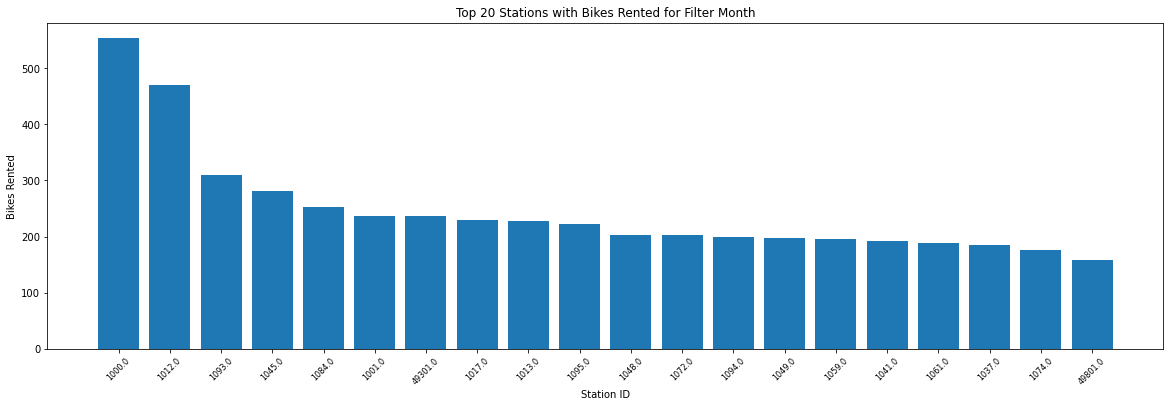

In [192]:
month_station_df = main_df[['Station ID', 'Date', 'fromCNT']].copy()

month_station_df['Month'] = month_station_df['Date']

for i in month_station_df.index:
    month_station_df['Month'][i] = month_station_df['Month'][i].month
    
month_station_df = month_station_df[['Station ID', 'fromCNT', 'Month']]

month_station_df = month_station_df.loc[month_station_df['Month']==filter_month]

month_station_df_grouped = month_station_df.groupby(['Station ID']).agg({'fromCNT':sum}).reset_index()

month_station_df_grouped = month_station_df_grouped.sort_values('fromCNT', ascending = False).head(20)

fig = plt.figure(figsize=(20, 6))
plt.bar(range(len(month_station_df_grouped['Station ID'])), month_station_df_grouped['fromCNT'])
plt.xticks(range(len(month_station_df_grouped['Station ID'])), month_station_df_grouped['Station ID'],\
               rotation = 45, fontsize = 8)
plt.xlabel('Station ID')
plt.ylabel('Bikes Rented')

plt.title('Top 20 Stations with Bikes Rented for Filter Month')
plt.show()


### Task 2.2

/var/folders/05/skbly5dd6ps2gw1n0sqr5s2r0000gp/T/ipykernel_61652/560335281.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_station_df['Month'][i] = month_station_df['Month'][i].month
/var/folders/05/skbly5dd6ps2gw1n0sqr5s2r0000gp/T/ipykernel_61652/560335281.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_station_df['Date'][i] = month_station_df['Date'][i].day


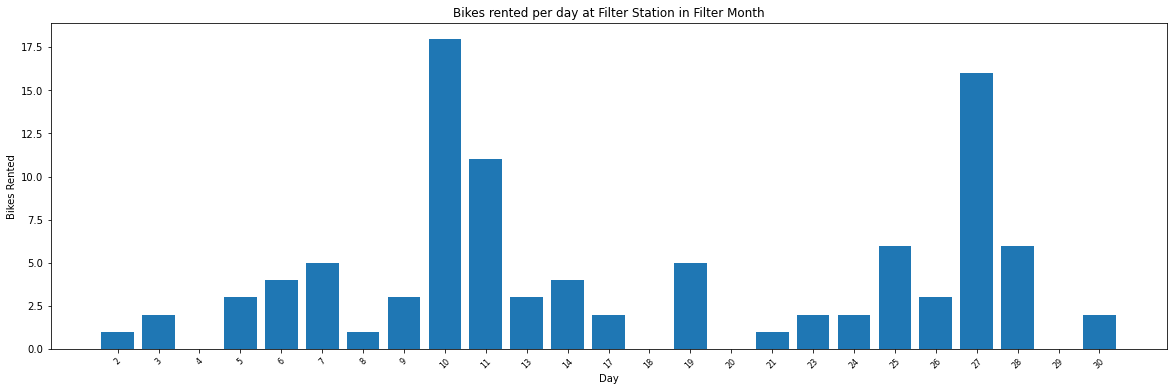

In [193]:

num_to_month = {1:31, 2:28, 3:31, 4:30, 
                5:31, 6:30, 7:31, 8:31, 9:30, 
                10:31, 11:30, 12:31}


month_station_df = main_df[['Station ID', 'Date', 'fromCNT']].copy()

month_station_df['Month'] = month_station_df['Date']

for i in month_station_df.index:
    month_station_df['Month'][i] = month_station_df['Month'][i].month
    month_station_df['Date'][i] = month_station_df['Date'][i].day
    
month_station_df = month_station_df[['Station ID', 'fromCNT', 'Month', 'Date']]

month_station_df = month_station_df.loc[month_station_df['Month']==filter_month]
month_station_df = month_station_df.loc[month_station_df['Station ID']==filter_stationID]

month_station_df_grouped = month_station_df.groupby(['Date']).agg({'fromCNT':sum}).reset_index()

fig = plt.figure(figsize=(20, 6))
plt.bar(range(len(month_station_df_grouped['Date'])), month_station_df_grouped['fromCNT'])
plt.xticks(range(len(month_station_df_grouped['Date'])), month_station_df_grouped['Date'],\
               rotation = 45, fontsize = 8)
plt.xlabel('Day')
plt.ylabel('Bikes Rented')

plt.title('Bikes rented per day at Filter Station in Filter Month')
plt.show()


### Task 2.3

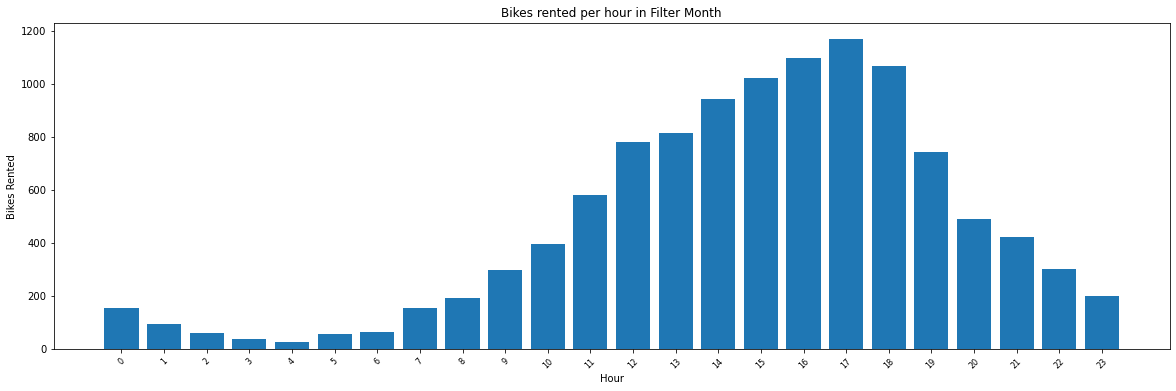

In [194]:
hour_df = df[['Starttime']].copy()

hour_df['date'] = hour_df['Starttime'].str.split()
hour_df['time'] = hour_df['Starttime'].str.split()

for i in hour_df.index:
    hour_df['date'][i] = pd.Timestamp(hour_df['date'][i][0]).date()
    hour_df['time'][i] = pd.Timestamp(hour_df['time'][i][1]).time()
    

hour_df['Month'] = hour_df['date']
hour_df['Hour'] = hour_df['time']

for i in hour_df.index:
    hour_df['Month'][i] = hour_df['Month'][i].month
    hour_df['Hour'][i] = hour_df['Hour'][i].hour

hour_df = hour_df[['Month', 'Hour']]


hour_df = hour_df.loc[hour_df['Month']==filter_month]
hour_df_grouped = hour_df.groupby(['Hour']).count().reset_index()

fig = plt.figure(figsize=(20, 6))
plt.bar(range(len(hour_df_grouped['Hour'])), hour_df_grouped['Month'])
plt.xticks(range(len(hour_df_grouped['Hour'])), hour_df_grouped['Hour'],\
               rotation = 45, fontsize = 8)
plt.xlabel('Hour')
plt.ylabel('Bikes Rented')

plt.title('Bikes rented per hour in Filter Month')
plt.show()


### Task 2.4

/var/folders/05/skbly5dd6ps2gw1n0sqr5s2r0000gp/T/ipykernel_61652/2468396334.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df['Month'][i] = bike_df['Month'][i].month
/var/folders/05/skbly5dd6ps2gw1n0sqr5s2r0000gp/T/ipykernel_61652/2468396334.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_df['Day'][i] = bike_df['Day'][i].day


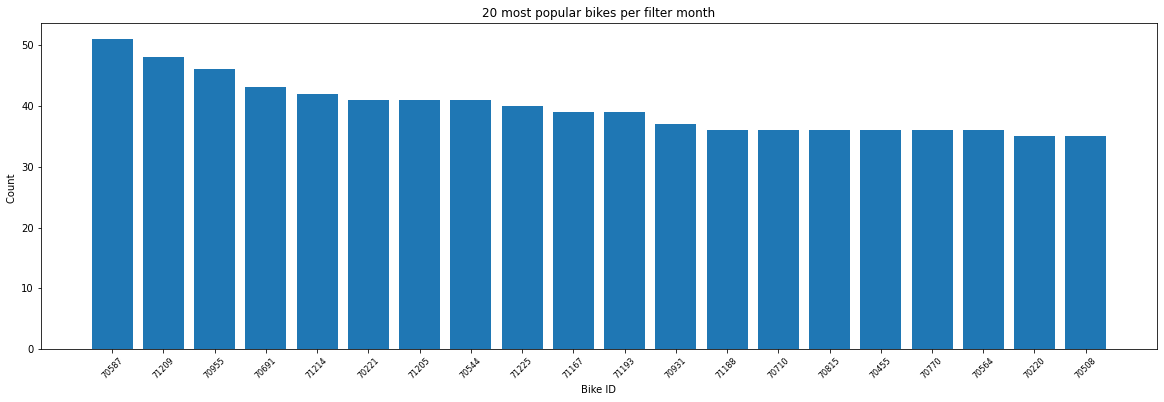

In [195]:
bike_df = df[['Bikeid', 'fromdate']].copy()

bike_df['Month'] = bike_df['fromdate']
bike_df['Day'] = bike_df['fromdate']

for i in bike_df.index:
    bike_df['Month'][i] = bike_df['Month'][i].month
    bike_df['Day'][i] = bike_df['Day'][i].day

    
    
bike_df = bike_df[['Bikeid', 'Month', 'Day']]

bike_df = bike_df.loc[bike_df['Month']==filter_month]

bike_df_grouped = bike_df.groupby(['Bikeid']).count().reset_index()

bike_df_grouped = bike_df_grouped[['Bikeid', 'Month']]

bike_df_grouped.columns = ['Bike ID', 'Count']

bike_df_grouped = bike_df_grouped.sort_values('Count', ascending = False).head(20)


fig = plt.figure(figsize=(20, 6))
plt.bar(range(len(bike_df_grouped['Bike ID'])), bike_df_grouped['Count'])
plt.xticks(range(len(bike_df_grouped['Bike ID'])), bike_df_grouped['Bike ID'],\
               rotation = 45, fontsize = 8)
plt.xlabel('Bike ID')
plt.ylabel('Count ')

plt.title('20 most popular bikes per filter month')
plt.show()


---
### Task 3

In this task you will cluster the data to group similar stations together, using a variety of clustering functions and visualize the results of the clustering.

### Task 3.1

In [196]:
month_station_df = main_df[['Station ID', 'Date', 'fromCNT' ,'RebalCNT']].copy()

month_station_df['Month'] = month_station_df['Date']

for i in month_station_df.index:
    month_station_df['Month'][i] = month_station_df['Month'][i].month

month_4_station_df = month_station_df.loc[(month_station_df['Month']==4)]

month_5_station_df = month_station_df.loc[(month_station_df['Month']==5)]

month_6_station_df = month_station_df.loc[(month_station_df['Month']==6)]

month_4_station_df_grouped = month_4_station_df.groupby(['Month', 'Station ID']).agg({'fromCNT':sum, 'RebalCNT':sum}).reset_index()

month_5_station_df_grouped = month_5_station_df.groupby(['Month', 'Station ID']).agg({'fromCNT':sum, 'RebalCNT':sum}).reset_index()

month_6_station_df_grouped = month_6_station_df.groupby(['Month', 'Station ID']).agg({'fromCNT':sum, 'RebalCNT':sum}).reset_index()

combine = pd.merge(month_4_station_df_grouped,month_5_station_df_grouped, on = 'Station ID')
combined = pd.merge(combine, month_6_station_df_grouped, on = 'Station ID')

combined = combined[['Station ID', 'fromCNT_x', 'RebalCNT_x', 'fromCNT_y', 'RebalCNT_y', 'fromCNT', 'RebalCNT']]

combined.columns = ['Station ID', 'fromCNT_4', 'RebalCNT_4', 'fromCNT_5', 'RebalCNT_5', 'fromCNT_6', 'RebalCNT_6']

combined = combined.set_index('Station ID')


/var/folders/05/skbly5dd6ps2gw1n0sqr5s2r0000gp/T/ipykernel_61652/2336546113.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  month_station_df['Month'][i] = month_station_df['Month'][i].month


In [197]:
k_means_1 = cluster.KMeans(n_clusters =5, init = 'k-means++', random_state = 5000)
k_means_2 = cluster.KMeans(n_clusters =10, init = 'k-means++', random_state = 5000)
k_means_3 = cluster.KMeans(n_clusters =8, init = 'k-means++', random_state = 5000)

db_1 = DBSCAN(eps=50, min_samples = 25)
db_2 = DBSCAN(eps=100, min_samples = 25)
db_3 = DBSCAN(eps = 75, min_samples = 60)

k_means_1.fit(combined)
k_means_2.fit(combined)
k_means_3.fit(combined)

db_1.fit(combined)
db_2.fit(combined)
db_3.fit(combined)

DBSCAN(eps=75, min_samples=60)

### Task 3.2

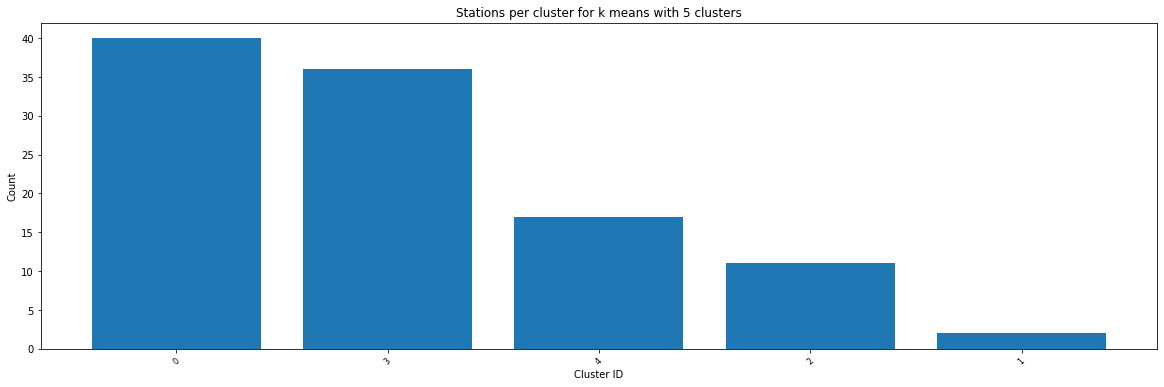

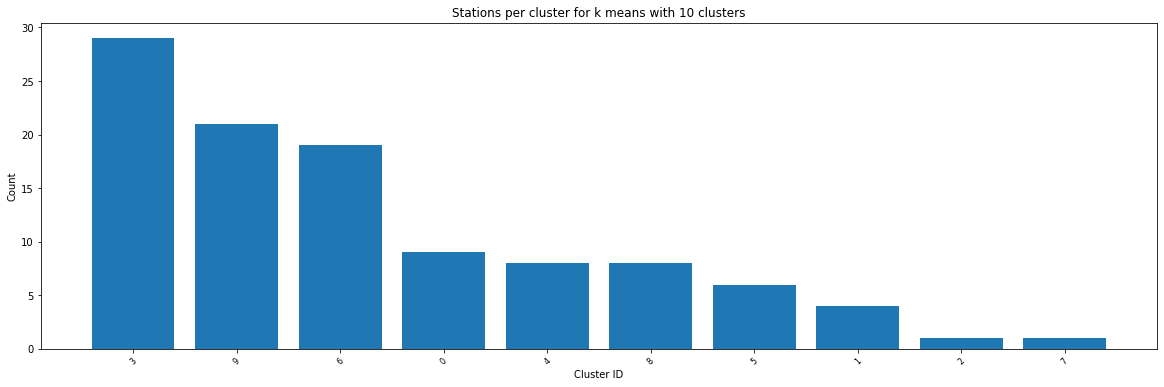

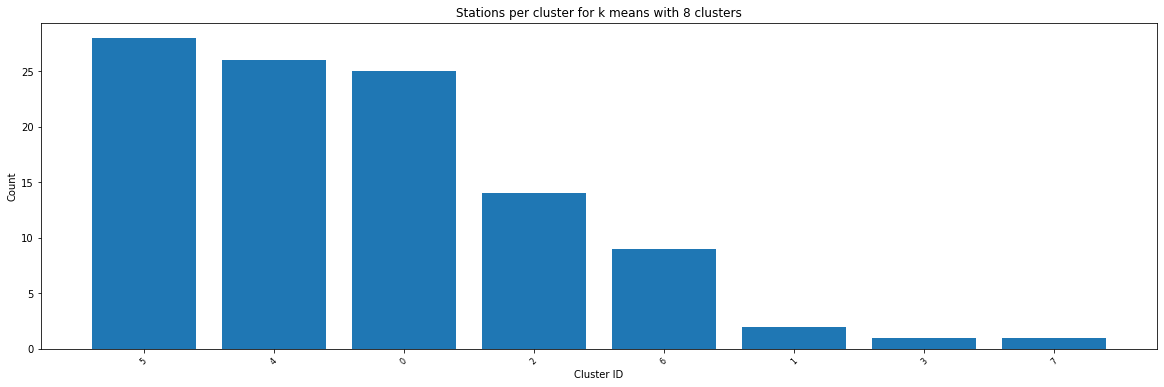

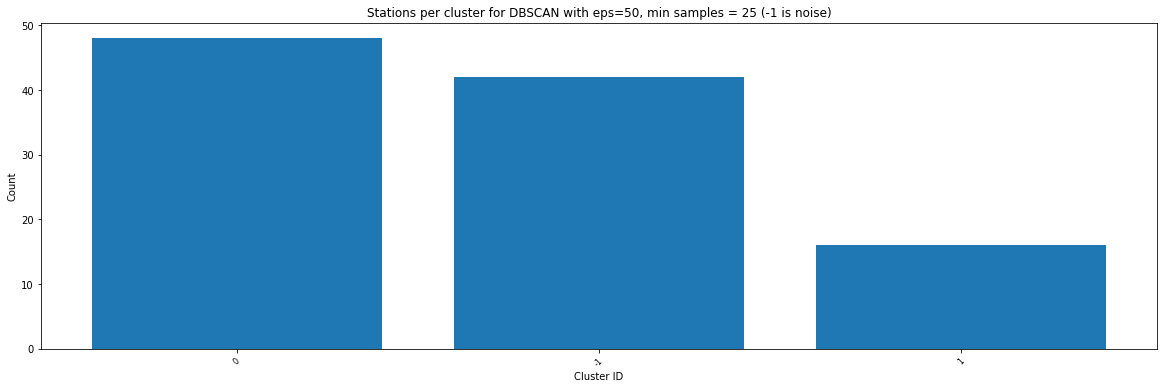

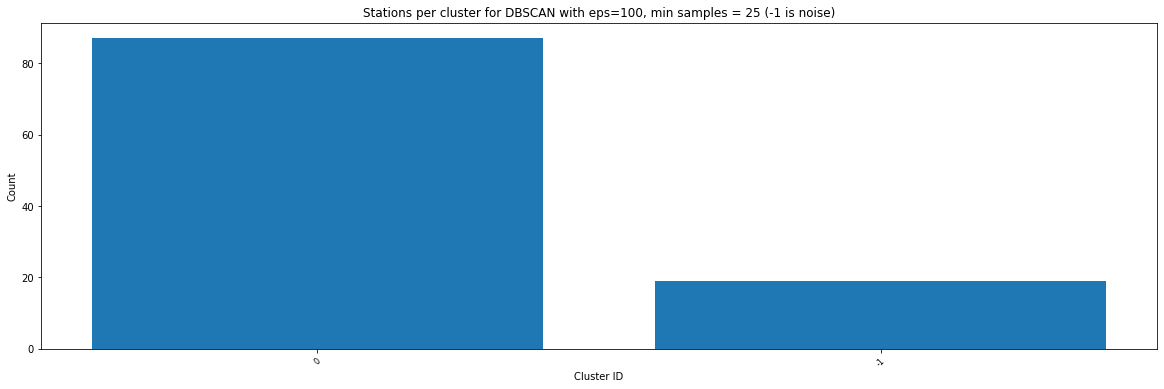

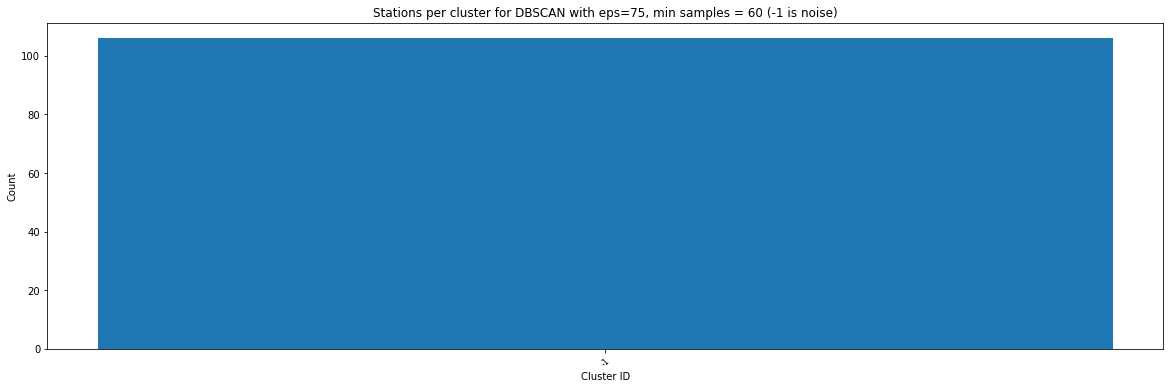

In [198]:
unique, counts = np.unique(k_means_1.labels_, return_counts=True)

kmeansdf=pd.DataFrame({'Cluster':unique, 'Count':counts})

kmeansdf = kmeansdf.sort_values('Count', ascending = False)

fig = plt.figure(figsize=(20, 6))
plt.bar(range(len(kmeansdf['Cluster'])), kmeansdf['Count'])
plt.xticks(range(len(kmeansdf['Cluster'])), kmeansdf['Cluster'],\
               rotation = 45, fontsize = 8)
plt.xlabel('Cluster ID')
plt.ylabel('Count')

plt.title('Stations per cluster for k means with 5 clusters')
plt.show()




unique, counts = np.unique(k_means_2.labels_, return_counts=True)

kmeansdf=pd.DataFrame({'Cluster':unique, 'Count':counts})

kmeansdf = kmeansdf.sort_values('Count', ascending = False)

fig = plt.figure(figsize=(20, 6))
plt.bar(range(len(kmeansdf['Cluster'])), kmeansdf['Count'])
plt.xticks(range(len(kmeansdf['Cluster'])), kmeansdf['Cluster'],\
               rotation = 45, fontsize = 8)
plt.xlabel('Cluster ID')
plt.ylabel('Count')

plt.title('Stations per cluster for k means with 10 clusters')
plt.show()



unique, counts = np.unique(k_means_3.labels_, return_counts=True)

kmeansdf=pd.DataFrame({'Cluster':unique, 'Count':counts})

kmeansdf = kmeansdf.sort_values('Count', ascending = False)

fig = plt.figure(figsize=(20, 6))
plt.bar(range(len(kmeansdf['Cluster'])), kmeansdf['Count'])
plt.xticks(range(len(kmeansdf['Cluster'])), kmeansdf['Cluster'],\
               rotation = 45, fontsize = 8)
plt.xlabel('Cluster ID')
plt.ylabel('Count')

plt.title('Stations per cluster for k means with 8 clusters')
plt.show()



unique, counts = np.unique(db_1.labels_, return_counts=True)

dbdf=pd.DataFrame({'Cluster':unique, 'Count':counts})

dbdf = dbdf.sort_values('Count', ascending = False)

fig = plt.figure(figsize=(20, 6))
plt.bar(range(len(dbdf['Cluster'])), dbdf['Count'])
plt.xticks(range(len(dbdf['Cluster'])), dbdf['Cluster'],\
               rotation = 45, fontsize = 8)
plt.xlabel('Cluster ID')
plt.ylabel('Count')

plt.title('Stations per cluster for DBSCAN with eps=50, min samples = 25 (-1 is noise)')
plt.show()


unique, counts = np.unique(db_2.labels_, return_counts=True)

dbdf=pd.DataFrame({'Cluster':unique, 'Count':counts})

dbdf = dbdf.sort_values('Count', ascending = False)

fig = plt.figure(figsize=(20, 6))
plt.bar(range(len(dbdf['Cluster'])), dbdf['Count'])
plt.xticks(range(len(dbdf['Cluster'])), dbdf['Cluster'],\
               rotation = 45, fontsize = 8)
plt.xlabel('Cluster ID')
plt.ylabel('Count')

plt.title('Stations per cluster for DBSCAN with eps=100, min samples = 25 (-1 is noise)')
plt.show()



unique, counts = np.unique(db_3.labels_, return_counts=True)

dbdf=pd.DataFrame({'Cluster':unique, 'Count':counts})

dbdf = dbdf.sort_values('Count', ascending = False)

fig = plt.figure(figsize=(20, 6))
plt.bar(range(len(dbdf['Cluster'])), dbdf['Count'])
plt.xticks(range(len(dbdf['Cluster'])), dbdf['Cluster'],\
               rotation = 45, fontsize = 8)
plt.xlabel('Cluster ID')
plt.ylabel('Count')

plt.title('Stations per cluster for DBSCAN with eps=75, min samples = 60 (-1 is noise)')
plt.show()

### Task 3.3

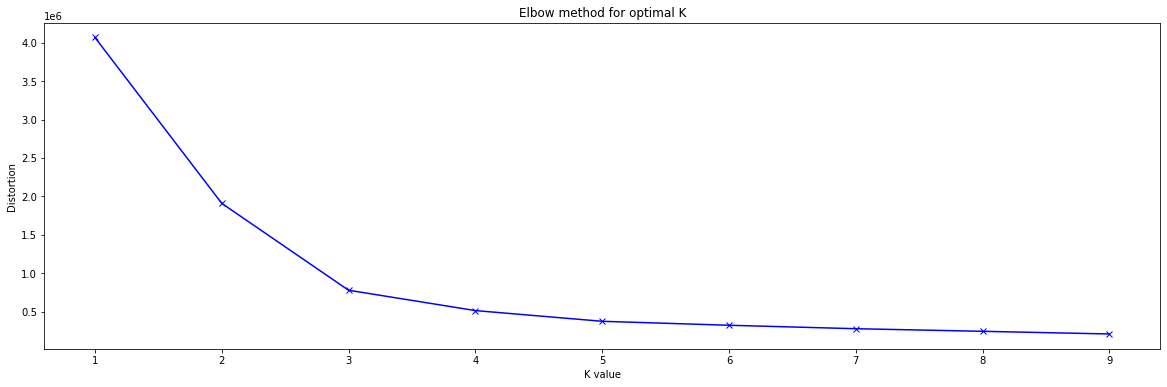

In [199]:

K = range(1,10)
inertias = []

for k in K:
    kmeanModel = cluster.KMeans(n_clusters =k, init = 'k-means++', random_state = 5000)
    kmeanModel.fit(combined)
    inertias.append(kmeanModel.inertia_)

plt.figure(figsize=(20,6))
plt.plot(K,inertias, 'bx-')
plt.xlabel('K value')
plt.ylabel('Distortion')
plt.title('Elbow method for optimal K')
plt.show()


From the elbow method, we can see that 4 is the optimal value of K.  From the algorithms I tried, I would use K-means as it provides more useful clustering and DBSCAN produces a lot of outliers. 